In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset weatherHistory.csv

In [2]:
data = pd.read_csv('/Users/ira_aghababyan/Desktop/ML Course/Programming/Polynominal Regression/weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Get rid of non-numerical columns of the dataset

In [3]:
df = data.drop(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], axis = 1)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


### Use 'Temperature (C)' as your target variable. Plot the relationship of each of the numerical features with the target variable

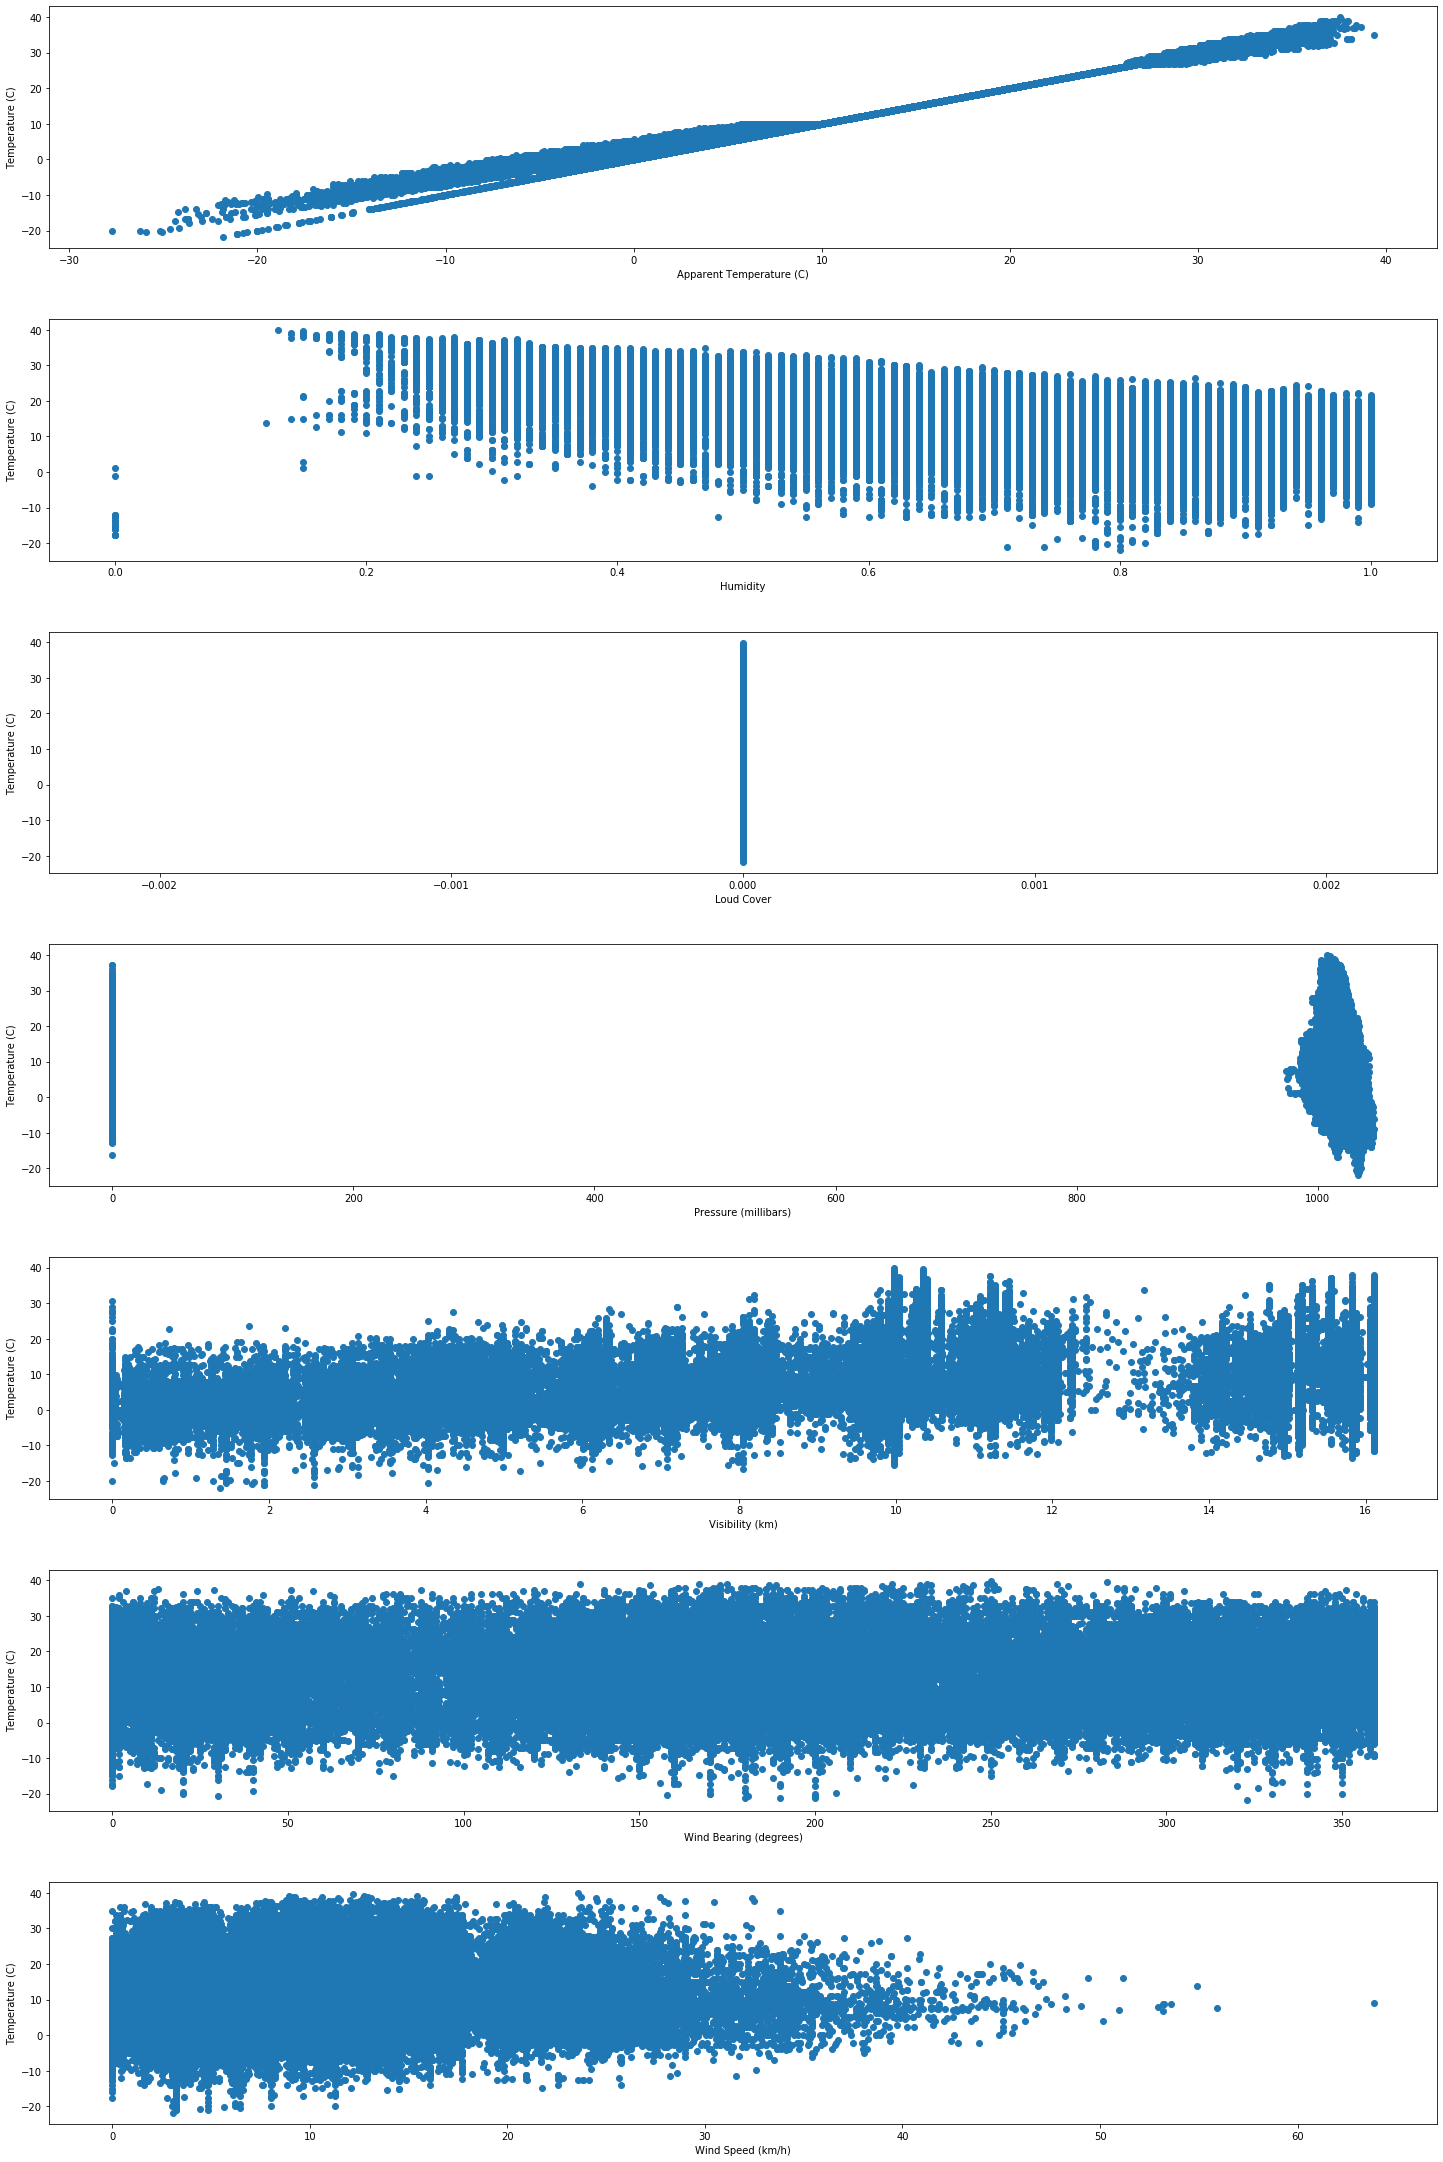

In [4]:
X = df[df.columns.difference(['Temperature (C)'])]
Y = df['Temperature (C)']

fig, axis = plt.subplots(7, 1)
fig.set_figwidth(20)
fig.set_figheight(30)
fig.tight_layout(h_pad = 5)

for i, feauture in enumerate(X.columns.tolist()):
    axis[i].scatter(df[feauture], Y)
    axis[i].set_xlabel(feauture)
    axis[i].set_ylabel('Temperature (C)')


In [5]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


### Leave only one feature that has a linear relationship with the target variable.

In [6]:
X = df[['Humidity']]
Y = df['Temperature (C)']

### Divide the dataset into training and test sets with the ratio 80:20.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [8]:
X_train

,Humidity
37347,0.96
23348,0.70
92275,0.53
60087,0.60
40607,0.68
...,...
53459,0.28
10742,0.85
49689,0.93
58564,0.90


In [9]:
X_test

,Humidity
78125,0.71
96394,0.47
3702,0.97
77971,0.84
94348,0.85
...,...
32218,0.41
34889,0.40
35553,0.52
43311,0.59


In [10]:
Y_train

37347    -0.022222
23348     6.572222
92275    23.050000
60087    22.066667
40607    14.305556
           ...    
53459    23.844444
10742    -3.894444
49689    13.866667
58564     9.566667
61615     9.733333
Name: Temperature (C), Length: 77162, dtype: float64

In [11]:
 Y_test

78125    13.727778
96394    27.661111
3702     17.827778
77971     7.655556
94348     4.844444
           ...    
32218    27.172222
34889    22.900000
35553    16.016667
43311    24.744444
79829    21.955556
Name: Temperature (C), Length: 19291, dtype: float64

### Implement a function fit_ridge_regression

In [12]:
def fit_ridge_regression(data_vector, response_vector, l=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :param l: ridge variable
    :return: numpy array beta of coefficients of the regression
    """
    data_vector['ones'] = 1
    
    beta = np.linalg.inv(data_vector.T.dot(data_vector)+ l*np.identity(data_vector.shape[1])).dot(data_vector.T).dot(response_vector)
    
    return beta

In [13]:
fit_ridge_regression(X_train, Y_train)

/Users/ira_aghababyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


array([-30.86812539,  34.60752037])

### Implement a function fit_polynomial_regression

In [14]:
def fit_polynomial_regression(data_vector, response_vector, degree=2):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    """
    X = np.array([[x ** i for i in range(0, degree+1)] 
                  for x in np.array(data_vector)])
    X = X.reshape(len(data_vector), degree + 1)
    Y = np.array(response_vector)
    Y = Y.reshape(len(data_vector), 1)
    
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    
    return beta

In [15]:
X_test_poly = X_test.values.reshape(-1,1)
X_test_poly

array([[0.71],
       [0.47],
       [0.97],
       ...,
       [0.52],
       [0.59],
       [0.89]])

In [16]:
X_train_poly = X_train['Humidity']
X_train_poly.head()

37347    0.96
23348    0.70
92275    0.53
60087    0.60
40607    0.68
Name: Humidity, dtype: float64

In [17]:
beta = fit_polynomial_regression(X_train_poly, Y_train)
beta

array([[ 40.05888781],
       [-49.00250879],
       [ 13.61961792]])

### Use the resulting train and test sets with the previous 2 functions to fit ridge regression and polynomial regression lines.

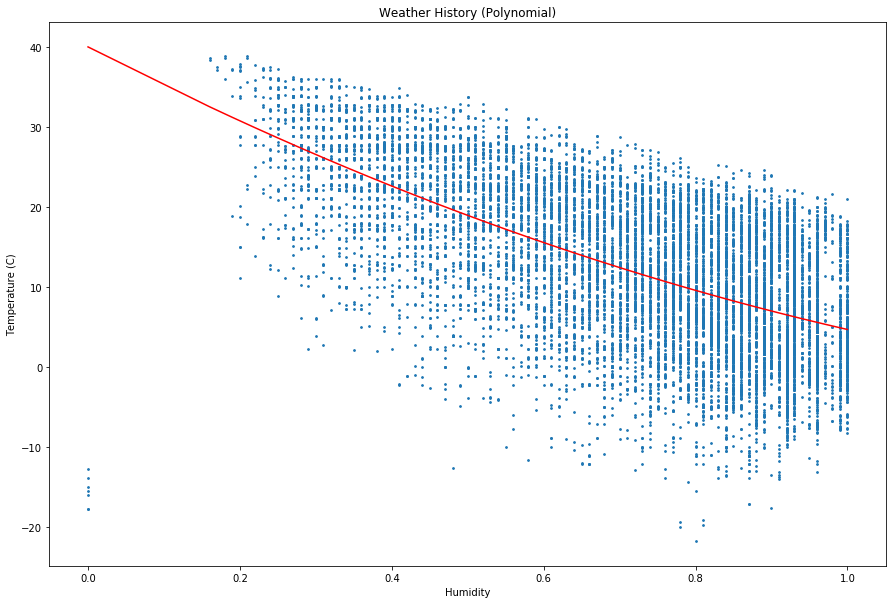

In [18]:
# polynomial_regression plot 
plt.figure(figsize=(15,10))
plt.scatter(X_test, Y_test, s=3)
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.title('Weather History (Polynomial)')

beta = fit_polynomial_regression(X_train_poly, Y_train, degree = 2)
curve_x = np.sort(np.array(X_test).T).T
curve_y = [sum(beta[i] * x ** i for i in range(len(beta))) for x in curve_x]

plt.plot(curve_x, curve_y, color='red')

plt.show()

In [19]:
b = fit_ridge_regression(X_train, Y_train, l = 5)
b

/Users/ira_aghababyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


array([-30.79191166,  34.54971385])

/Users/ira_aghababyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


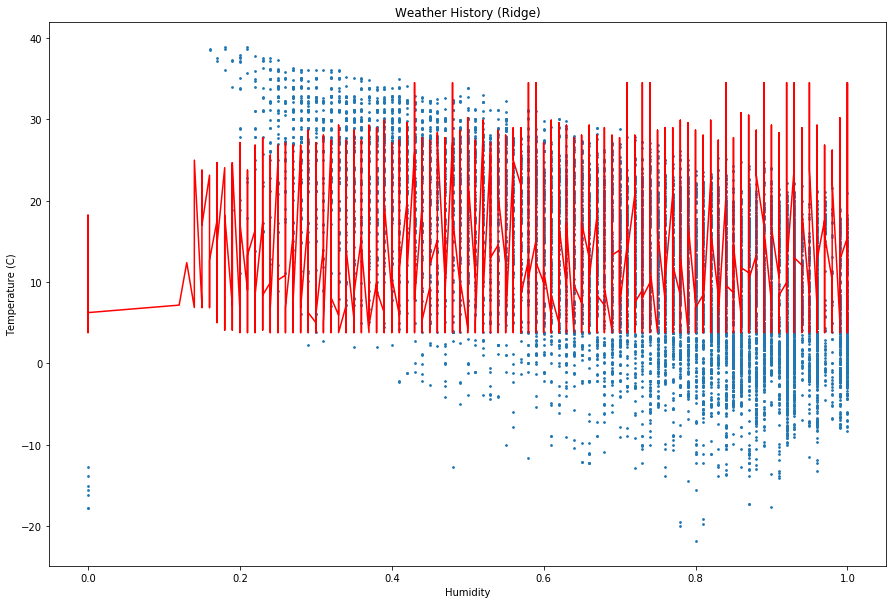

In [20]:
# ridge_regression plot 
plt.figure(figsize=(15,10))
plt.scatter(X_test, Y_test, s=3)
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.title('Weather History (Ridge)')

b = fit_ridge_regression(X_train, Y_train, l = 10)

curve_x = np.sort(np.array(X_train).T).T
curve_y = X_train.dot(b)

plt.plot(curve_x, curve_y, color='red')

plt.show()

### Calculate RMSE (root mean squared error) for ridge and polynomial regressions

In [21]:
#Polynomial RMSE
from sklearn.metrics import mean_squared_error
X_test_poly = np.sort(np.array(X_test).T).T
Y_pred_poly = [sum(beta[i] * x ** i for i in range(len(beta))) for x in X_test_poly]
np.sqrt(mean_squared_error(Y_test, Y_pred_poly))

11.291485249192387

In [22]:
#Ridge RMSE
X_test['ones'] = 1
y_pred = X_train.dot(b)
np.sqrt(mean_squared_error(Y_train, y_pred))

/Users/ira_aghababyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


7.388430590667368

### Now fit the ridge and polynomial regressions to your data using sklearn and compare the results with your own fit_1d_linear_regression function. Use RMSE for comparison.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [24]:
from sklearn.linear_model import Ridge

degree = 10

poly_features = PolynomialFeatures(degree=degree)
  
# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(np.array(X_train['Humidity']).reshape(-1, 1))

clf = Ridge(alpha=1.5)
clf.fit(X_train_poly, Y_train)

# predicting on training data-set
y_train_predicted = clf.predict(X_train_poly)

# predicting on test data-set
y_test_predicted = clf.predict(poly_features.fit_transform(np.array(X_test['Humidity']).reshape(-1, 1)))

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))

# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predicted))

In [25]:
rmse_train

7.341962776768596

In [26]:
rmse_test

7.397448282718281

### Use any additional visualizations that may help during your analysis.